### Active learning with the MNIST dataset

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
number_of_training_data = 1000
number_of_test_data = 100

In [123]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [124]:
print("train_x shape : ", train_x.shape)
print("train_y shape : ", train_y.shape)
print("test_x shape : ", test_x.shape)
print("test_y shape : ", test_y.shape)

train_x shape :  (60000, 28, 28)
train_y shape :  (60000,)
test_x shape :  (10000, 28, 28)
test_y shape :  (10000,)


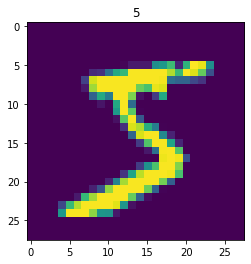

In [125]:
plt.imshow(train_x[0])
plt.title(train_y[0])
plt.show()

### Use a subset of the MNIST dataset (1000) and normalize:

In [126]:
X = train_x[:number_of_training_data] / 255
Y = train_y[:number_of_training_data]
X_test = test_x[:number_of_test_data] / 255
Y_test = test_y[:number_of_test_data]

print("X shape : ", X.shape)
print("Y shape : ", Y.shape)
print("X_test shape : ", X_test.shape)
print("Y_test shape : ", Y_test.shape)

X shape :  (1000, 28, 28)
Y shape :  (1000,)
X_test shape :  (100, 28, 28)
Y_test shape :  (100,)


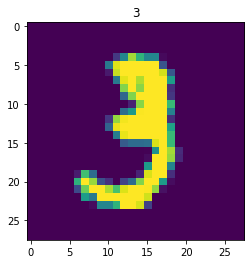

In [127]:
plt.imshow(X[10])
plt.title(Y[10])
plt.show()

### Plot distribution of the subset:

In [128]:
count_labels = [len(Y[Y==label]) for label in np.unique(Y)]
print(count_labels)

[97, 116, 99, 93, 105, 92, 94, 117, 87, 100]


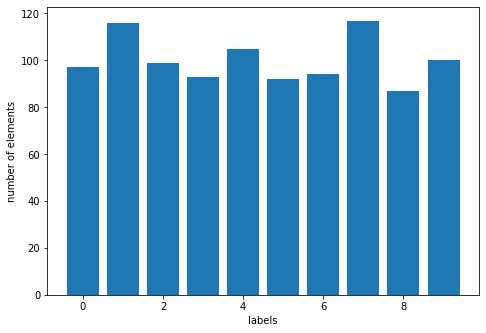

In [129]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.unique(Y),count_labels)
plt.xlabel('labels')
plt.ylabel('number of elements')
plt.show()

### Prepare data and build model:

In [147]:
# one hot encoding
Y_enc = np.zeros((len(Y), 10), dtype='int')
print(Y_enc.shape)
for i, y in enumerate(Y):
    Y_enc[i, y] = 1
    
Y_test_enc = np.zeros((len(Y_test), 10), dtype='int')
print(Y_test_enc.shape)
for i, y in enumerate(Y_test):
    Y_test_enc[i, y] = 1

(1000, 10)
(100, 10)


In [131]:
X = X.reshape(-1, 28, 28, 1)
print(X.shape)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_test.shape)

(1000, 28, 28, 1)
(100, 28, 28, 1)


In [132]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='acc')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [133]:
history = model.fit(X, Y_enc, epochs=20, batch_size=256, validation_data=(X_test, Y_test_enc))

Epoch 1/20
4/4 [==============================] - 1s 181ms/step - loss: 0.6653 - acc: 0.0913 - val_loss: 0.5269 - val_acc: 0.1400
Epoch 2/20
4/4 [==============================] - 1s 136ms/step - loss: 0.4811 - acc: 0.1220 - val_loss: 0.3544 - val_acc: 0.1400
Epoch 3/20
4/4 [==============================] - 0s 121ms/step - loss: 0.3452 - acc: 0.1149 - val_loss: 0.3533 - val_acc: 0.2100
Epoch 4/20
4/4 [==============================] - 1s 129ms/step - loss: 0.3652 - acc: 0.1402 - val_loss: 0.3470 - val_acc: 0.2700
Epoch 5/20
4/4 [==============================] - 0s 123ms/step - loss: 0.3477 - acc: 0.1942 - val_loss: 0.3138 - val_acc: 0.3800
Epoch 6/20
4/4 [==============================] - 0s 124ms/step - loss: 0.3179 - acc: 0.2652 - val_loss: 0.3136 - val_acc: 0.4800
Epoch 7/20
4/4 [==============================] - 1s 131ms/step - loss: 0.3161 - acc: 0.3230 - val_loss: 0.3107 - val_acc: 0.5600
Epoch 8/20
4/4 [==============================] - 0s 123ms/step - loss: 0.3100 - acc: 0.37

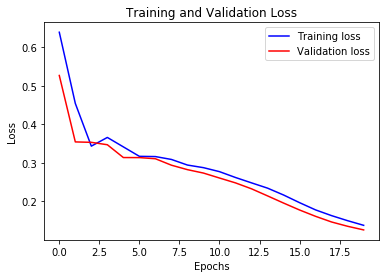

In [134]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

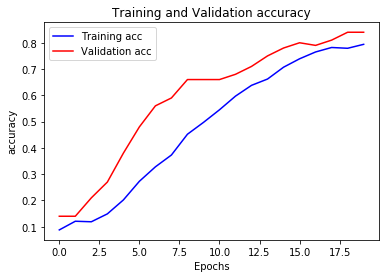

In [135]:
def visualize_loss(history, title):
    loss = history.history["acc"]
    val_loss = history.history["val_acc"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training acc")
    plt.plot(epochs, val_loss, "r", label="Validation acc")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation accuracy")

In [136]:
X_not_labeled = train_x[number_of_training_data:] / 255
X_not_labeled = X_not_labeled.reshape(-1, 28, 28, 1)
Y_not_labeled = train_y[number_of_training_data:]


In [137]:
y_pred = model.predict(X_not_labeled)
print(y_pred.shape)

(59000, 10)


In [138]:
y_pred_ = np.argmax(y_pred, axis=1)
print("accuracy on unseen data : ", (np.sum(y_pred_ == Y_not_labeled) / len(Y_not_labeled))*100)

accuracy on unseen data :  82.56949152542373


In [151]:
print(np.argmax(y_pred[:10], axis=1))
li = np.argmax(y_pred[:10], axis=1)

[0 7 1 1 9 4 4 9 4 8]


In [152]:
i = 0
confidence_threshold = 0.9
for elem in li:
    if y_pred[i, elem] >= confidence_threshold:
        print("high confidence: {}, prediction: {}, true: {},".format(y_pred[i, elem], elem, Y_not_labeled[i]))
    else:
        print("low confidence: {}, prediction: {}, true: {},".format(y_pred[i, elem], elem, Y_not_labeled[i]))
    i+=1

low confidence: 0.7775964736938477, prediction: 0, true: 0,
low confidence: 0.8976605534553528, prediction: 7, true: 7,
high confidence: 0.9183861613273621, prediction: 1, true: 1,
low confidence: 0.8685340881347656, prediction: 1, true: 1,
low confidence: 0.43467244505882263, prediction: 9, true: 4,
low confidence: 0.5909554362297058, prediction: 4, true: 9,
low confidence: 0.5648347735404968, prediction: 4, true: 4,
low confidence: 0.5159052014350891, prediction: 9, true: 3,
high confidence: 0.97462397813797, prediction: 4, true: 4,
low confidence: 0.44397416710853577, prediction: 8, true: 8,


In [153]:
max_pred = np.max(y_pred, axis=1)
print(max_pred.shape)

(59000,)


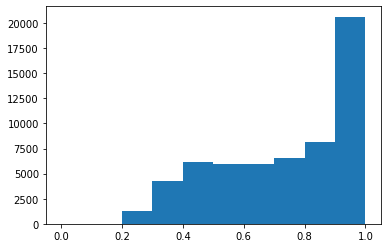

In [154]:
plt.hist(max_pred, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.show()

In [155]:
# more than 0.8 confidence
y_pred_high_confidence = []
new_y_not_labeled = []
arg_y_pred = np.argmax(y_pred, axis=1)
for i, arg in enumerate(arg_y_pred):
    if y_pred[i, arg] > 0.9:
        y_pred_high_confidence.append(arg)
        new_y_not_labeled.append(Y_not_labeled[i])
    else:
        y_pred_high_confidence.append(-1)
        new_y_not_labeled.append(-1)

In [156]:
print("accuracy on unseen data using predictions with high confidence : ",
      (np.sum(np.array(y_pred_high_confidence) == np.array(new_y_not_labeled)) / len(new_y_not_labeled))*100)

accuracy on unseen data using predictions with high confidence :  99.7457627118644


In [157]:
print(new_y_not_labeled[:10])
print(y_pred_high_confidence[:10])

[-1, -1, 1, -1, -1, -1, -1, -1, 4, -1]
[-1, -1, 1, -1, -1, -1, -1, -1, 4, -1]


In [163]:
# number of new labeled data
nb_new_labeled = [1 if i>=0 else 0 for i in y_pred_high_confidence]
print("{} new labeled samples of {}".format(np.sum(nb_new_labeled), len(nb_new_labeled)))

20643 new labeled samples of 59000


### Repeat the process with the new labels (with high confidence) and manually label data with low confidence